In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('Classified Data',index_col=0)

In [4]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler= StandardScaler()

In [12]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [13]:
scaled= scaler.transform(df.drop('TARGET CLASS',axis=1))

In [16]:
df1=pd.DataFrame(scaled,columns=df.columns[:-1])

In [19]:
from sklearn.model_selection import train_test_split


In [21]:
x=df1
y=df['TARGET CLASS']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=101)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [156]:
knn=KNeighborsClassifier(n_neighbors=17)

In [157]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=17)

In [158]:
pred=knn.predict(xtest)

In [159]:
from sklearn.metrics import classification_report,confusion_matrix

In [160]:
print(confusion_matrix(ytest,pred))

[[153   6]
 [  9 132]]


In [161]:
print (classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       159
           1       0.96      0.94      0.95       141

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [149]:
error=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    pred=knn.predict(xtest)
    error.append(np.mean(pred!=ytest))

Text(0, 0.5, 'Error rate')

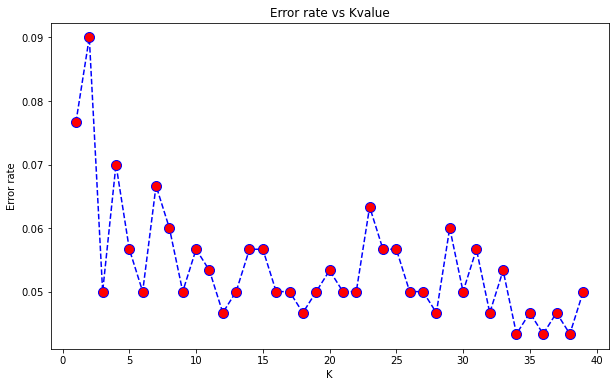

In [150]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error,color='blue',linestyle='dashed',marker='o',
        markerfacecolor='red',markersize=10)
plt.title('Error rate vs Kvalue')
plt.xlabel('K')
plt.ylabel('Error rate')